In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [174]:
df = pd.read_csv("11-iris.csv")

In [175]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [177]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [178]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<Axes: xlabel='Species', ylabel='count'>

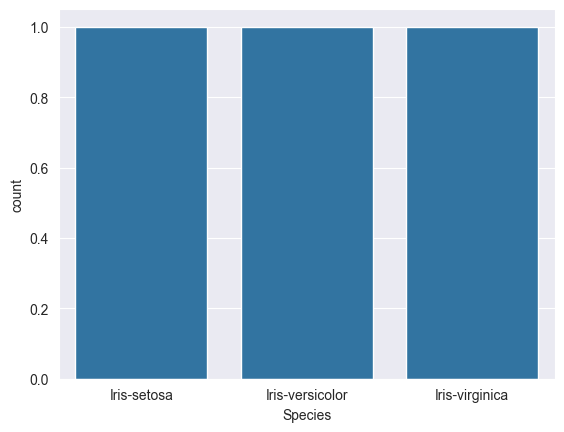

In [179]:
sns.countplot(df["Species"].value_counts())

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'SepalLengthCm'}>],
       [<Axes: title={'center': 'SepalWidthCm'}>,
        <Axes: title={'center': 'PetalLengthCm'}>],
       [<Axes: title={'center': 'PetalWidthCm'}>, <Axes: >]], dtype=object)

<Figure size 1500x500 with 0 Axes>

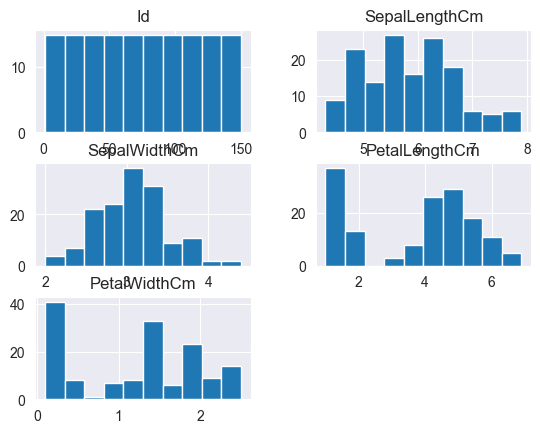

In [180]:
plt.figure(figsize=(15,5))
df.hist()

<Figure size 1000x1000 with 0 Axes>

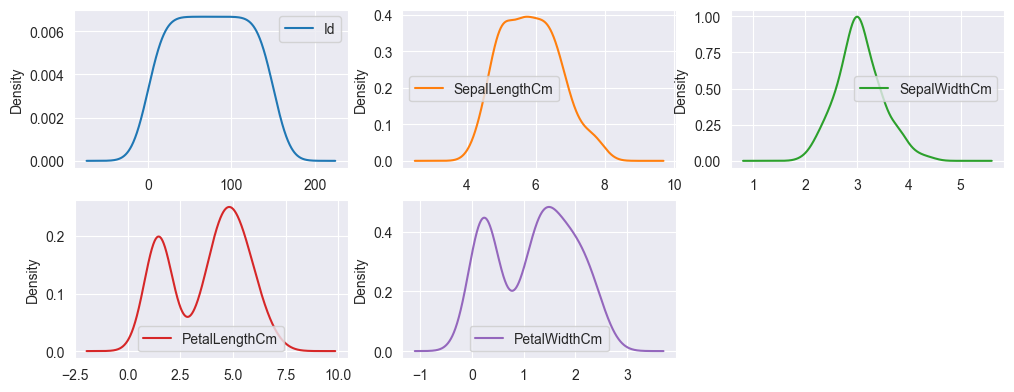

<Figure size 1000x1000 with 0 Axes>

In [181]:
df.plot(kind="density",subplots=True,layout=((3,3)),sharex=False,sharey=False,figsize=(12,7))
plt.figure(figsize=(10,10))

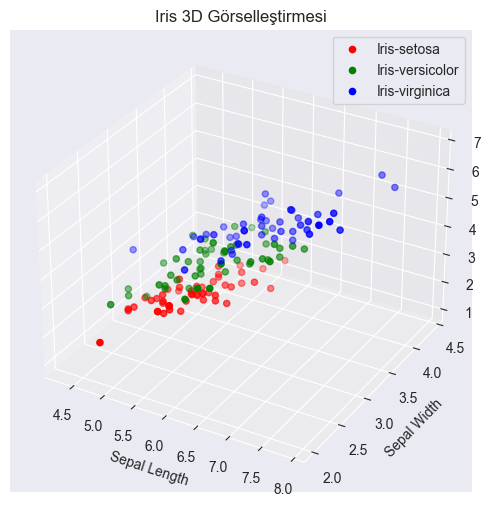

In [182]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}

for species, group in df.groupby('Species'):
    ax.scatter(group['SepalLengthCm'], group['SepalWidthCm'], group['PetalLengthCm'],
    label=species, color=colors[species])

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.legend()
plt.title("Iris 3D Görselleştirmesi")
plt.show()


In [183]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


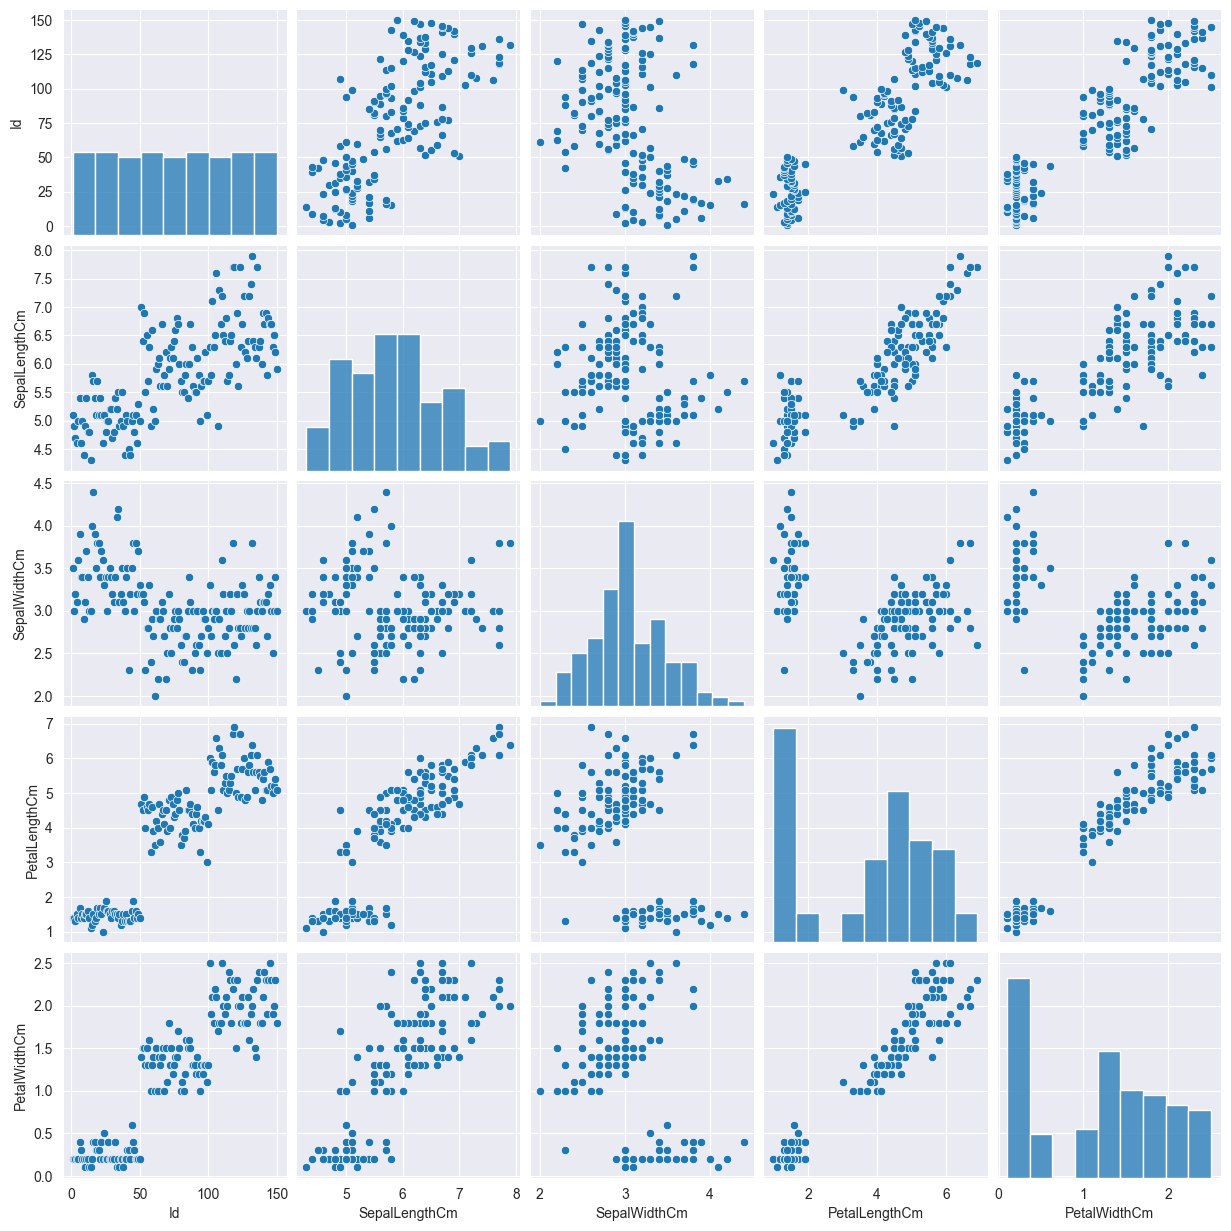

In [184]:
sns.pairplot(df)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

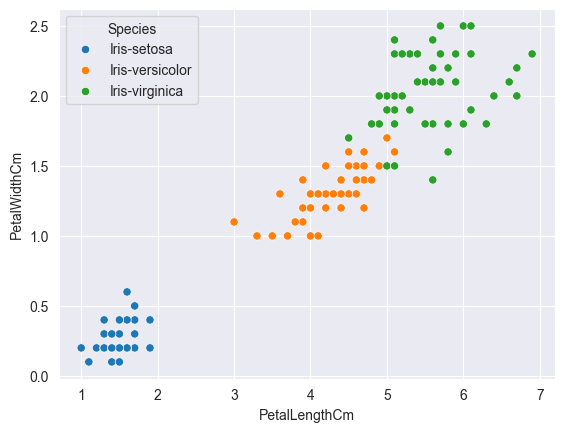

In [185]:
sns.scatterplot(x=df["PetalLengthCm"], y=df["PetalWidthCm"], hue=df["Species"])

In [186]:
df.drop("Id", axis=1, inplace=True)

In [187]:
from sklearn.preprocessing import LabelEncoder

In [188]:
label_encoder = LabelEncoder()
df["Species"] = label_encoder.fit_transform(df["Species"])

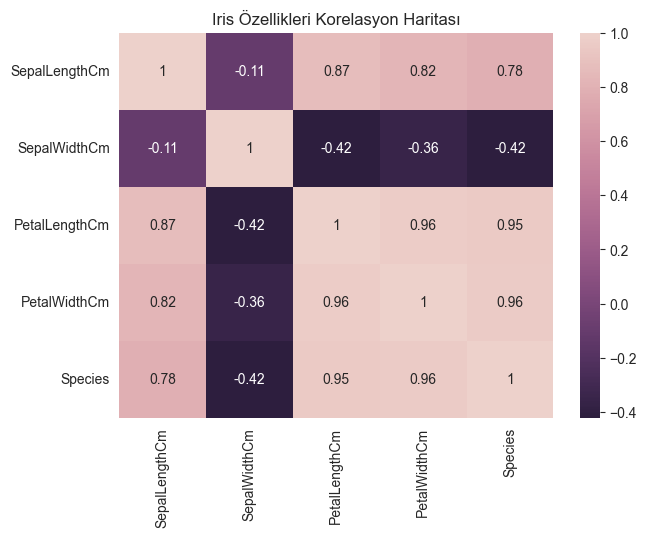

In [189]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True,reverse=True))
plt.title("Iris Özellikleri Korelasyon Haritası")
plt.show()

In [219]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x="SepalLengthCm",
    y="SepalWidthCm",
    z="PetalLengthCm",
    color="Species"
)
fig.show()

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [191]:
df["Species"].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [192]:
X = df.drop("Species", axis=1)
y = df["Species"]

In [193]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [194]:
from sklearn.preprocessing import StandardScaler

In [195]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [196]:
from sklearn.naive_bayes import GaussianNB

In [197]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

,priors,None
,var_smoothing,1e-09


In [198]:
y_pred = gnb.predict(X_test_scaled)

In [199]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test,y_pred)
print("confusion_matrix:\n ",cm)
print("\naccuracy_score",accuracy_score(y_test,y_pred))
print("\nclassification_report",classification_report(y_test,y_pred))

confusion_matrix:
  [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]

accuracy_score 1.0

classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



SVR

In [200]:
from sklearn.svm import SVR

In [201]:
svr = SVR()
svr.fit(X_train_scaled,y_train)
y_pred2 = svr.predict(X_test)

C:\Users\cemal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but SVR was fitted without feature names



In [202]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,root_mean_squared_error

print("MSE:", mean_squared_error(y_test, y_pred2))
print("RMSE:", root_mean_squared_error(y_test, y_pred2))
print("MAE:", mean_absolute_error(y_test, y_pred2))
print("R²:", r2_score(y_test, y_pred2))

MSE: 0.6626564921410033
RMSE: 0.8140371564867315
MAE: 0.6558072010690711
R²: -0.04920611255658858


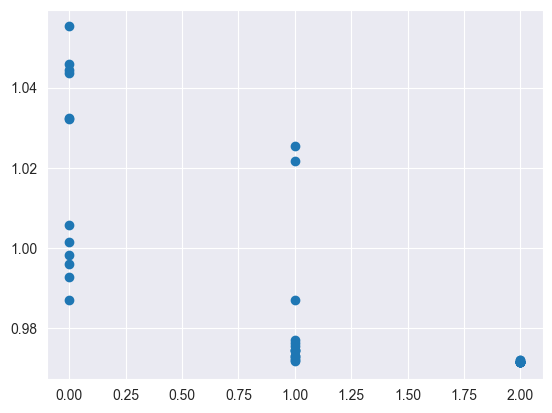

In [203]:
plt.scatter(y_test,y_pred2)

In [204]:
from sklearn.model_selection import GridSearchCV

In [205]:
param_grid = {
    "kernel": ["linear", "rbf"],
    "C":[0.1,1,10,100,1000],
    "gamma":["scale","auto"]
}

In [206]:
grid = GridSearchCV(SVR(), param_grid)
grid.fit(X_train_scaled, y_train)
y_pred3 = grid.predict(X_test_scaled)


Linear Regression Model
MAE:  0.1370922225430935
MSE:  0.029810360880130244
R2:  0.9528002619397937


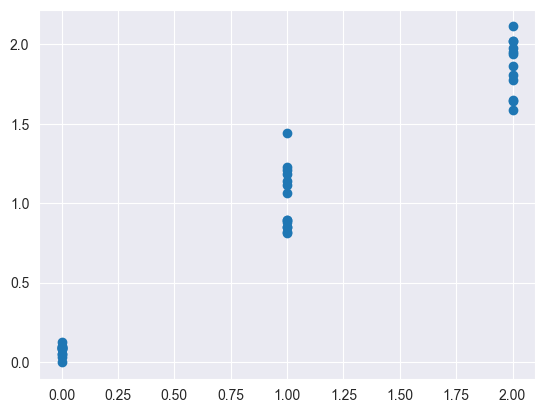

In [207]:
mae = mean_absolute_error(y_test,y_pred3)
mse = mean_squared_error(y_test,y_pred3)
r2 = r2_score(y_test,y_pred3)
print("\nLinear Regression Model")
print("MAE: ",mae)
print("MSE: ",mse)
print("R2: ",r2)
plt.scatter(y_test,y_pred3)

SVC

In [208]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_scaled, y_train)
y_pred4 = svc.predict(X_test_scaled)

In [209]:
cm = confusion_matrix(y_test,y_pred4)
print("confusion_matrix:\n ",cm)
print("\naccuracy_score",accuracy_score(y_test,y_pred4))
print("\nclassification_report",classification_report(y_test,y_pred4))

confusion_matrix:
  [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]

accuracy_score 1.0

classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



**Logistic Regression**

In [214]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred5 = logreg.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_pred5)
print("confusion_matrix:\n ",cm)
print("\naccuracy_score",accuracy_score(y_test,y_pred5))
print("\nclassification_report",classification_report(y_test,y_pred5))

confusion_matrix:
  [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]

accuracy_score 1.0

classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



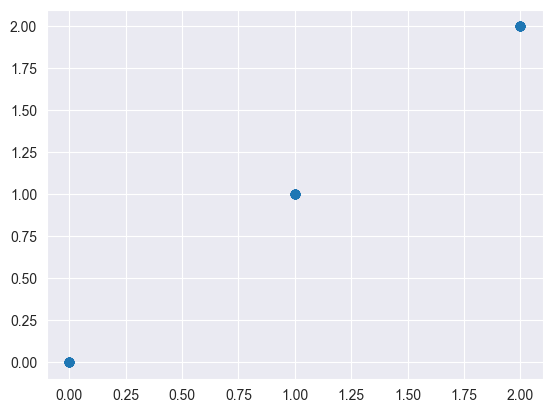

In [215]:
plt.scatter(y_test,y_pred5)